# Importing the Libraries

In [22]:
#Importing the libraries to watch the 'fits' image and get the data array
import astropy
#import plotly.graph_objects as go
from astropy.io import fits
from sklearn.metrics import mean_squared_error
#Importing a library that is useful to read the original file
import pandas as pd
import pylab as plb
from datetime import datetime

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
#Importing a visual library with some illustrative set up
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors 
from matplotlib import cm
import numpy as np
import math 
import pywt
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (16, 8) 
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
plt.rcParams["axes.grid"] = False

colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']
cmap_big = cm.get_cmap('Spectral', 512)
cmap = mcolors.ListedColormap(cmap_big(np.linspace(0.7, 0.95, 256))) 
bbox_props = dict(boxstyle="round,pad=0.3", fc=colors[0], alpha=.5)

In [5]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np
import mysql.connector

# Importing the Dataset

In [6]:
df=pd.read_csv('ClimateData.csv')

# Correlations

In [7]:
def orange(val):
    color = 'darkorange'
    return 'background-color: %s' % color

def green(val):
    color = 'green'
    return 'background-color: %s' % color

In [8]:
df.corr('pearson').style.applymap(orange, subset=pd.IndexSlice['AverageTemperature', 'year'])
        

,Unnamed: 0,AverageTemperature,AverageTemperatureUncertainty,Latitude,Longitude,year,month
Unnamed: 0,1.000000,-0.150666,-0.042153,0.108868,0.131233,0.010070,0.000089
AverageTemperature,-0.150666,1.000000,0.124937,-0.356831,0.021579,0.030045,0.094833
AverageTemperatureUncertainty,-0.042153,0.124937,1.000000,-0.147289,-0.104874,-0.037998,-0.041553
Latitude,0.108868,-0.356831,-0.147289,1.000000,0.111391,0.000102,0.000043
Longitude,0.131233,0.021579,-0.104874,0.111391,1.000000,-0.000311,-0.000132
year,0.010070,0.030045,-0.037998,0.000102,-0.000311,1.000000,-0.010511
month,0.000089,0.094833,-0.041553,0.000043,-0.000132,-0.010511,1.000000


# Stationarity

In [9]:
import statsmodels.tsa.stattools as ts


In [10]:
CITIES=np.array(df.City.drop_duplicates())


In [13]:
P_V=[]
CO=[]
OK=[]
for i in range(len(CITIES)):
    c_data=df[df['City']==CITIES[i]]
    CO.append(c_data.Country.drop_duplicates().tolist()[0])
    p=ts.adfuller(c_data.AverageTemperature)[1]
    P_V.append(p)
    if p>=0.05:
        OK.append(1)
    else:
        OK.append(0)
    
    #co=df[df['Country']==CITIES[i]]
data_p=pd.DataFrame({'P_Value':P_V, 'City':CITIES, 'Country':CO,'Non-Stationary':OK})
data_p.sort_values(by='P_Value',ascending=False).head(5)

,P_Value,City,Country,Non-Stationary
25,0.053097,Dar Es Salaam,Tanzania,1
63,0.036341,Mogadishu,Somalia,0
30,0.021900,Fortaleza,Brazil,0
1,0.016483,Addis Abeba,Ethiopia,0
17,0.012264,Cape Town,South Africa,0


In [14]:
perc=1-sum(OK)/len(OK)

In [16]:
print('The  ' + str(perc*100) + '% of the dataset has succeded the stationary test, alpha=5%')

The  99.0% of the dataset has succeded the stationary test, alpha=5%


Text(0.5, 0, 'City')

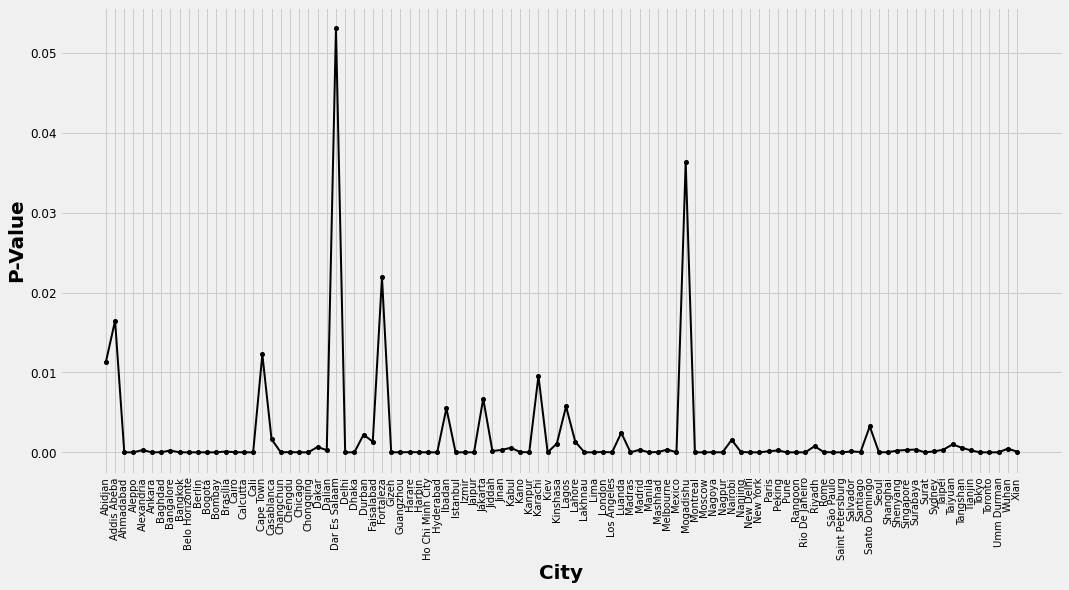

In [24]:
#plt.rcParams['figure.figsize'] = (28, 8) 
plt.grid(True)
plt.plot(np.arange(0,len(data_p)),data_p.P_Value,marker='.',color='black')
plt.xticks(np.arange(0,len(data_p)),CITIES,rotation=90,fontsize=10)
plt.ylabel('P-Value',fontsize=20)
plt.xlabel('City',fontsize=20)

In [19]:
YEARS=np.arange(1951+5,2021,5)

In [20]:
PERC=[]
k=0
for y in YEARS:
    k=k+1
    df_year=df[df['year']<=y]
    P_V=[]
    CO=[]
    OK=[]
    for i in range(len(CITIES)):
        c_data=df_year[df_year['City']==CITIES[i]]
        CO.append(c_data.Country.drop_duplicates().tolist()[0])
        p=ts.adfuller(c_data.AverageTemperature)[1]
        P_V.append(p)
        if p>=0.05:
            OK.append(1)
        else:
            OK.append(0)

        #co=ten_df[ten_df['Country']==CITIES[i]]
    PERC.append(1-sum(OK)/len(OK))
    print(str(k) + ' out of ' +str(len(YEARS)))

1 out of 13
2 out of 13
3 out of 13
4 out of 13
5 out of 13
6 out of 13
7 out of 13
8 out of 13
9 out of 13
10 out of 13
11 out of 13
12 out of 13
13 out of 13


Text(0.5, 0, 'Years')

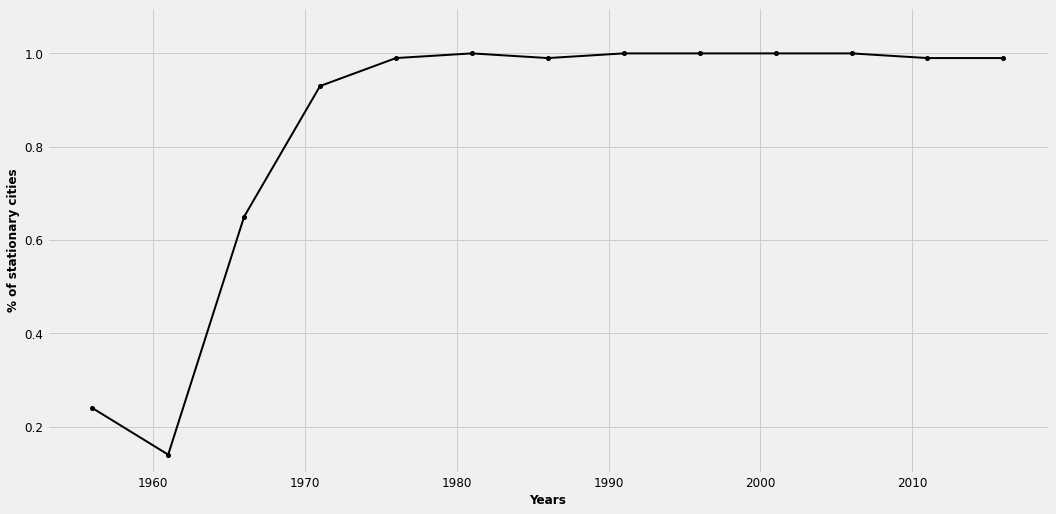

In [27]:
plt.ylim(0.1,1.1)
plt.plot(YEARS,PERC,marker='.',color='black')
plt.grid(True)
plt.ylabel('% of stationary cities')
plt.xlabel('Years')

In [28]:
df_min=df[df['year']<=YEARS[1]]
P_V=[]
CO=[]
OK=[]
for i in range(len(CITIES)):
    c_data=df_min[df_min['City']==CITIES[i]]
    CO.append(c_data.Country.drop_duplicates().tolist()[0])
    p=ts.adfuller(c_data.AverageTemperature)[1]
    P_V.append(p)
    if p>=0.05:
        OK.append(1)
    else:
        OK.append(0)

In [29]:
data_p=pd.DataFrame({'P_Value':P_V, 'City':CITIES, 'Country':CO,'Non-Stationary':OK})


In [40]:
nstatcity=data_p[data_p['Non-Stationary']==1].City.tolist()

In [36]:
df=df.drop(columns=['Unnamed: 0'])

In [58]:
nstatdf=df[df['City'].isin(nstatcity)]

In [62]:
YEAR_CITY=[]
for city in nstatdf.City.drop_duplicates().tolist():
    city_data=nstatdf[nstatdf.City==city]
    year_city=[]
    for y in city_data.year.drop_duplicates().tolist():
        year_city_data=city_data[city_data.year==y]
        year_city.append(year_city_data.AverageTemperature.mean())
    YEAR_CITY.append(year_city)

In [107]:
from matplotlib import colors
import random

In [92]:
Colors=list(colors.BASE_COLORS)


([<matplotlib.axis.XTick at 0x7fc2d7027910>,
 [Text(0, 0, '1951'),
  Text(5, 0, '1956'),
  Text(10, 0, '1961'),
  Text(15, 0, '1966'),
  Text(20, 0, '1971'),
  Text(25, 0, '1976'),
  Text(30, 0, '1981'),
  Text(35, 0, '1986'),
  Text(40, 0, '1991'),
  Text(45, 0, '1996'),
  Text(50, 0, '2001'),
  Text(55, 0, '2006'),
  Text(60, 0, '2011')])

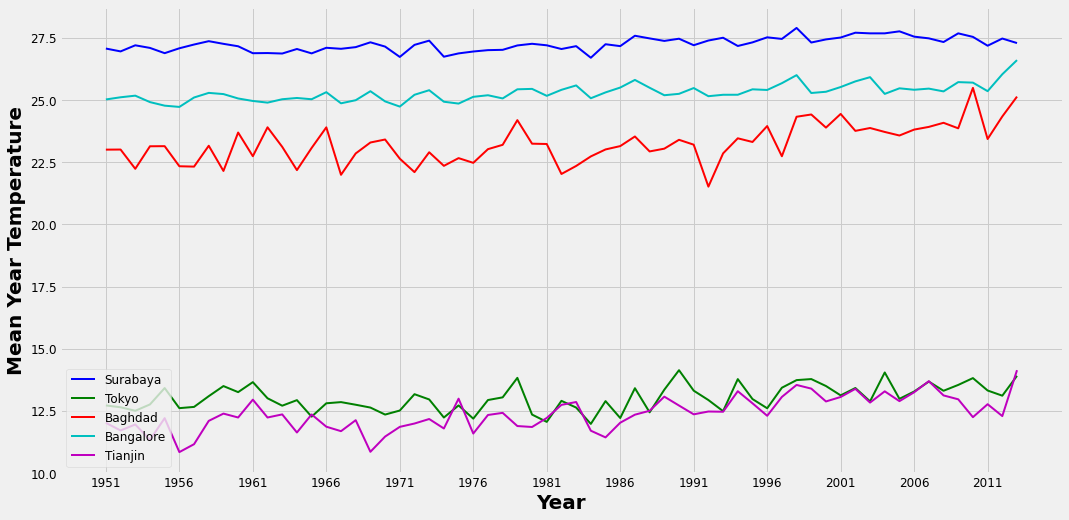

In [110]:
for i in range(5):
    j=random.choice(np.arange(0,len(nstatcity)))
    plt.plot(YEAR_CITY[j],label=nstatcity[j],color=Colors[i])
plt.legend(loc=3)
plt.grid()
plt.ylabel('Mean Year Temperature',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.xticks(np.arange(0,len(YEAR_CITY[0]),5),np.arange(city_data.year.drop_duplicates().min(),city_data.year.drop_duplicates().max(),5))

In [117]:
data_p[(data_p['Non-Stationary']==0) & (data_p.City=='London')]

,P_Value,City,Country,Non-Stationary
54,3.988974e-17,London,United Kingdom,0


In [118]:
London=df[df['City']=='London']

In [120]:
London.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,month
40609,1951-01-01,3.864,0.180,London,United Kingdom,51.507322,-0.127647,1951,1
40610,1951-02-01,3.697,0.232,London,United Kingdom,51.507322,-0.127647,1951,2
40611,1951-03-01,4.516,0.214,London,United Kingdom,51.507322,-0.127647,1951,3
40612,1951-04-01,6.815,0.148,London,United Kingdom,51.507322,-0.127647,1951,4
40613,1951-05-01,10.414,0.320,London,United Kingdom,51.507322,-0.127647,1951,5


In [228]:
YN=[]
P_V=[]
for y in YEARS:
    k=k+1
    df_year=London[London['year']<=y]
    p=ts.adfuller(df_year.AverageTemperature)[1]
    P_V.append(p)
    if p>=0.05:
        YN.append(1)
    else:
        YN.append(0)


In [229]:
if sum(YN)==0:
    print('London has always been stationary for D.Fuller test')

London has always been stationary for D.Fuller test


In [230]:
london_stat=pd.DataFrame({'P-value':P_V,'Years':YEARS})
london_stat.head()

,P-value,Years
0,3.994689e-14,1956
1,3.988974e-17,1961
2,3.668644e-02,1966
3,1.335888e-02,1971
4,1.061724e-02,1976


In [133]:
YEAR_LON=[]
for y in London.year.drop_duplicates().tolist():
    YEAR_LON.append(London[London['year']==y].AverageTemperature.mean())

In [137]:
years=London.year.drop_duplicates().tolist()

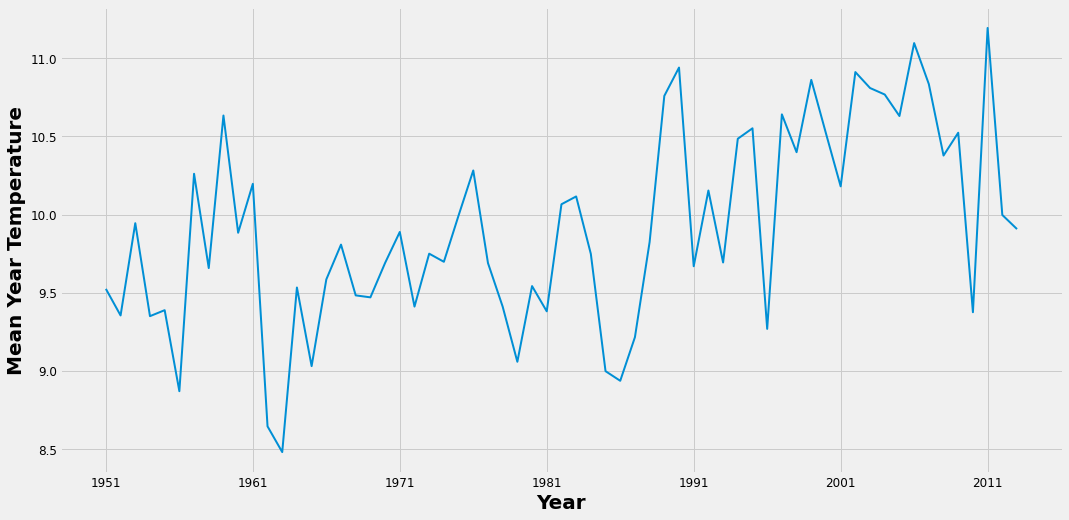

In [142]:
plt.plot(YEAR_LON)
plt.ylabel('Mean Year Temperature',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.xticks(np.arange(0,len(YEAR_LON),10),np.arange(min(years),max(years),10))
plt.grid(True)

In [159]:
print('The smoothed dataset gave the following p value for D-Fuller test: \n')
print(ts.adfuller(YEAR_LON)[1])

The smoothed dataset gave the following p value for D-Fuller test: 

0.36662386470675845


In [175]:
cities=df.City.drop_duplicates().tolist()
years=df.year.drop_duplicates().tolist()

In [204]:
CITY_DATA=[]
for c in cities:
    c_data=df[df['City']==c]
    YEAR_CITY=[]
    for y in years:
        YEAR_CITY.append(c_data[c_data['year']==y].AverageTemperature.mean())
    CITY_DATA.append(YEAR_CITY)

In [205]:
smooth_data=pd.DataFrame()
year_city=np.repeat(cities,len(years))

In [206]:
CITY_DATA=np.array(CITY_DATA).reshape(1,-1)

In [208]:
CITY_DATA=CITY_DATA[0]

In [210]:
smooth_data['AverageTemperature']=CITY_DATA
smooth_data['City']=year_city

In [216]:
smooth_data['year']=np.tile(years,len(cities))

In [220]:
smooth_data.head()

,AverageTemperature,City,year
0,26.324750,Abidjan,1951
1,26.279500,Abidjan,1952
2,26.244417,Abidjan,1953
3,26.011083,Abidjan,1954
4,26.027833,Abidjan,1955


In [231]:
P_V=[]
OK=[]
for i in range(len(cities)):
    c_data=smooth_data[smooth_data['City']==cities[i]]
    p=ts.adfuller(c_data.AverageTemperature)[1]
    P_V.append(p)
    if p>=0.05:
        OK.append(1)
    else:
        OK.append(0)
    
    #co=smooth_data[smooth_data['Country']==cities[i]]
data_p=pd.DataFrame({'P_Value':P_V, 'City':cities,'Non-Stationary':OK})
data_p.sort_values(by='P_Value',ascending=False).head(5)

,P_Value,City,Non-Stationary
97,0.998238,Umm Durman,1
20,0.998230,Chengdu,1
48,0.998192,Kiev,1
89,0.997618,Surat,1
1,0.995381,Addis Abeba,1


In [237]:
p_v=np.array(data_p.P_Value)
p_v_pos=p_v[np.where(p_v>0.05)]
p_v_neg=p_v[np.where(p_v<=0.05)]

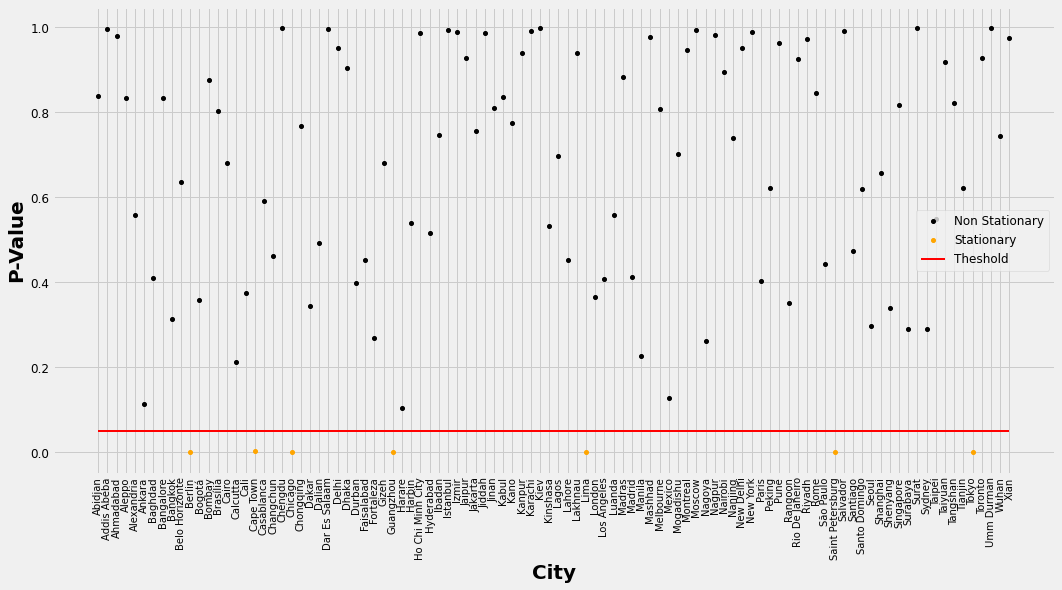

In [245]:
plt.grid(True)
plt.plot(np.argwhere(p_v>=0.05),p_v_pos,'.',color='black',label='Non Stationary')
plt.plot(np.argwhere(p_v<0.05),p_v_neg,'.',color='orange',label='Stationary')

plt.plot(np.arange(0,len(data_p)),np.zeros(len(data_p))+0.05,label='Theshold',color='red')
plt.xticks(np.arange(0,len(data_p)),CITIES,rotation=90,fontsize=10)
plt.ylabel('P-Value',fontsize=20)
plt.xlabel('City',fontsize=20)
plt.legend()

In [247]:
data_p[data_p.City=='Tokyo']

,P_Value,City,Non-Stationary
95,0.000002,Tokyo,0


Text(0.5, 0, 'Year')

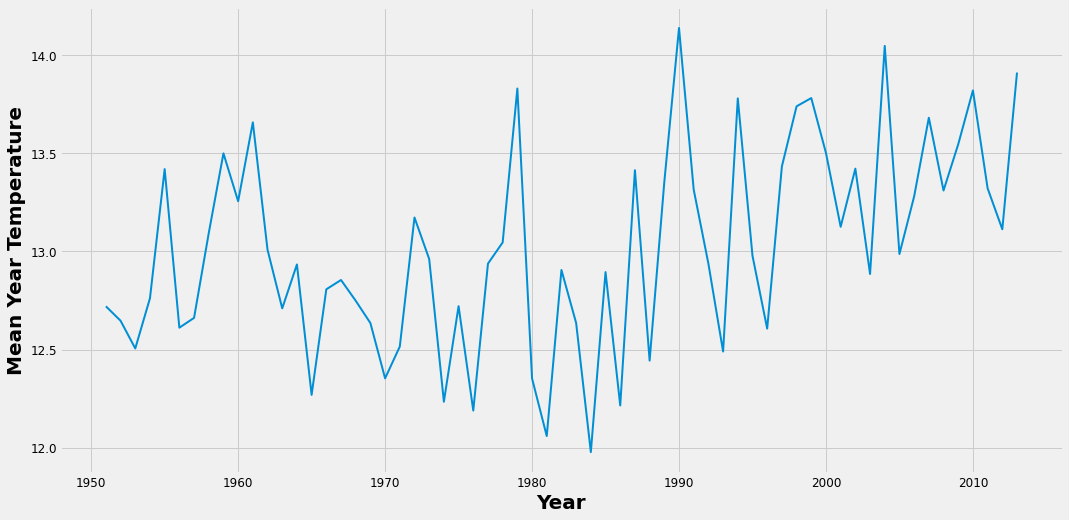

In [257]:
plt.plot(smooth_data[smooth_data.City=='Tokyo'].year,smooth_data[smooth_data.City=='Tokyo'].AverageTemperature)
plt.grid(True)
plt.ylabel('Mean Year Temperature',fontsize=20)
plt.xlabel('Year',fontsize=20)
#plt.xticks(np.arange(0,len(YEAR_LON),10),np.arange(min(years),max(years),10))
#plt.grid(True)